In [2]:
import pandas as pd
df = pd.read_csv("../vehicles_us.csv")

In [3]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Matplotlib is building the font cache; this may take a moment.


<Axes: >

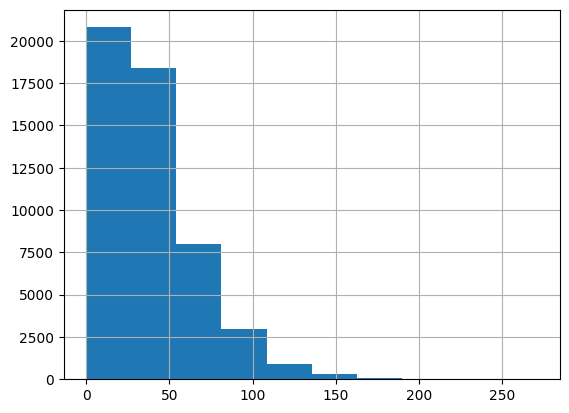

In [8]:
df.days_listed.hist()

In [9]:
import matplotlib.pyplot as plt


In [16]:
df.paint_color.value_counts(dropna =False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [19]:
df_no_color=df[df.paint_color.isna()]

In [20]:
df_no_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [21]:
df_color=df[~df.paint_color.isna()]

In [22]:
df_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32


<Axes: >

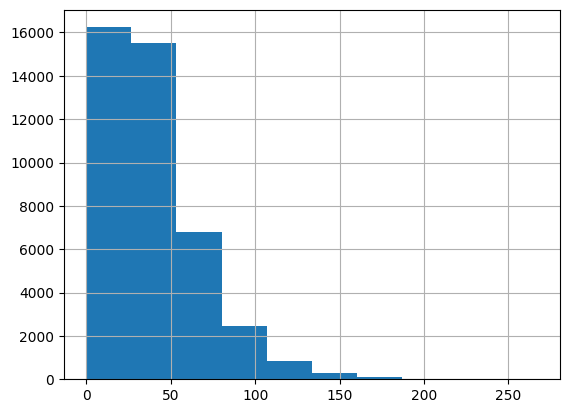

In [23]:
df_color.days_listed.hist()

In [24]:
import plotly_express as px

In [25]:
px.histogram?


Signature:
px.histogram(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    marginal=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    barnorm=None,
    histnorm=None,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    histfunc=None,
    cumulative=None,
    nbins=None,
    text_auto=False,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a histogram, rows of `data_frame` are grouped together into a
    rectangular mark to visualize the 1D distribution of a

In [31]:
color_index=[]
for c in df.paint_color:
    if pd.isna(c):
        color_index.append(0)
    else:
        color_index.append(1)
df["color_index"]=color_index

In [32]:
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,color_index
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,1
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,1


In [34]:
px.histogram(df, x="days_listed", color="color_index", barmode="overlay", histnorm='probability')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'color_index=0<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '0',
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19,  9, 19, ..., 25, 89, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'color_index=1<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '1',
              'offsetgroup': '1',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([50, 79, 28, ..., 22, 32, 71]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'overlay',
               'legend': {'title': {'text': 'color_index'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'days_listed'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'probability'}}}
})

In [37]:
px.histogram(df, x="days_listed", color="condition", barmode="overlay", histnorm='probability')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=good<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'good',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'good',
              'offsetgroup': 'good',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19, 50,  8, ..., 51, 71, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=like new<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'like new',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'like new',
              'offsetgroup': 'like new',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([79, 64, 43, ...,  4, 11, 37]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=fair<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'fair',
              'marker': {'color': '#00cc96', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'fair',
              'offsetgroup': 'fair',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([  9,  50,  49, ...,  25,  56, 158]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=excellent<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'excellent',
              'marker': {'color': '#ab63fa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'excellent',
              'offsetgroup': 'excellent',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([28, 15, 73, ..., 63, 89, 32]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=salvage<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'salvage',
              'marker': {'color': '#FFA15A', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'salvage',
              'offsetgroup': 'salvage',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 23,  19,   9,  33,  39,  12, 113,  22,  17,  71,  61,  38,  44,  28,
                           34,  78,  13,  64,  36,  32,   9,  59,  63,  80,  20,  31,  67,  25,
                           15,  45,  16,  90, 100, 106,  35,  52,  13,  30,  42,  16,  49,  66,
                           27,  33,   7,  12,  51, 134,   4,  12,  28,  36,  49,  30,  39,  34,
                           50,  51,  53,  81,  56,   5,  21,  29,   8,  19,  54,   1,  22,  68,
                           31,  17,  45,  28,  18,  46,  15,  44,  12,  19,  39, 115,  23,  23,
                           18,  47,  72,   8,  52,  18,  96,  61,  21,  72,  44,  39,  24, 100,
                           27,  28,  49,  38,  46,  41,  22,  76,  17,   9,  43,   7,  33,  23,
                            7,  22,  22]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bin

In [38]:
df.condition.value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [41]:
cond_index=[]
for c in df.condition:
    if c in ["excellent", "good", "like new"]:
        cond_index.append(True)
    else:
        cond_index.append(False)
df2=df[cond_index]


In [42]:
px.histogram(df2, x="days_listed", color="condition", barmode="overlay", histnorm='probability')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=good<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'good',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'good',
              'offsetgroup': 'good',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19, 50,  8, ..., 51, 71, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=like new<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'like new',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'like new',
              'offsetgroup': 'like new',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([79, 64, 43, ...,  4, 11, 37]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=excellent<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'excellent',
              'marker': {'color': '#00cc96', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'excellent',
              'offsetgroup': 'excellent',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([28, 15, 73, ..., 63, 89, 32]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'overlay',
               'legend': {'title': {'text': 'condition'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'days_listed'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'probability'}}}
})

In [44]:
trim_date=[]
for d in df.date_posted:
    trim_date.append(d[:-3])
df["trim_date"]=trim_date
df.trim_date.value_counts()

trim_date
2018-10    4643
2018-12    4564
2019-03    4559
2018-05    4503
2018-08    4480
2018-07    4471
2018-09    4452
2019-01    4452
2018-11    4354
2018-06    4216
2019-02    4014
2019-04    2817
Name: count, dtype: int64

In [45]:
date_index=[]
for d in df.trim_date:
    if c in ["2019-04"]:
        date_index.append(False)
    else:
        date_index.append(True)
df3=df[date_index]

In [46]:
px.histogram(df3, x="days_listed", color="trim_date", barmode="overlay", histnorm='probability')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2018-06<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2018-06',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2018-06',
              'offsetgroup': '2018-06',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19, 15, 40, ..., 63, 11, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2018-10<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2018-10',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2018-10',
              'offsetgroup': '2018-10',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 50,  23, 101, ...,  50, 158,  37]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2019-02<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2019-02',
              'marker': {'color': '#00cc96', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2019-02',
              'offsetgroup': '2019-02',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([79, 17, 20, ..., 25, 61, 73]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2019-03<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2019-03',
              'marker': {'color': '#ab63fa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2019-03',
              'offsetgroup': '2019-03',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 9, 29, 29, ..., 71, 88,  1]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2019-04<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2019-04',
              'marker': {'color': '#FFA15A', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2019-04',
              'offsetgroup': '2019-04',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 28,  37,  13, ..., 175,  25,  44]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2018-12<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2018-12',
              'marker': {'color': '#19d3f3', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2018-12',
              'offsetgroup': '2018-12',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([73, 13, 31, ..., 63, 12,  4]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=201